# SIT744 Assignment 2: Transfer learning and Efficient Training of Deep Learning Models 

<div class="alert-info">
    <p>Due: <strong>8:00pm 17 May 2021</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>45%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~15%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to achieve better image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~1%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


In [1]:
#load required libraries
import tensorflow as tf
from tensorflow import keras
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,Reshape
from tensorflow.keras.datasets import fashion_mnist,cifar10
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
from tensorflow.keras import models,layers,optimizers
import tensorflow.keras
import matplotlib.pyplot as plt

In [110]:
#load fashion-mnist data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [111]:
#image reshape
train_images = train_images.reshape((60000,28*28))
test_images = test_images.reshape((10000,28*28))

In [112]:
#image rescaling
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [113]:
#convert labels into float datatype
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [114]:
batch_size = 256
train_size = round(train_images.shape[0]*0.9,None)
train_size

54000

In [115]:
# split validation and train from training data
x_val = train_images[train_size:]
y_val = train_labels[train_size:]
x_train = train_images[:train_size]
y_train = train_labels[:train_size]
np.unique(x_train)

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
       0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196079, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941177, 0.13333334,
       0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
       0.15686275, 0.16078432, 0.16470589, 0.16862746, 0.17254902,
       0.1764706 , 0.18039216, 0.18431373, 0.1882353 , 0.19215687,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568628, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313726, 0.24705882, 0.2509804 ,
       0.25490198, 0.25882354, 0.2627451 , 0.26666668, 0.27058825,
       0.27450982, 0.2784314 , 0.28235295, 0.28627452, 0.29019

In [116]:
# td.data pipeline 
def configure_for_performance(ds):
  ds = ds.cache()
  #ds = ds.shuffle()
  ds = ds.batch(batch_size)
  return ds

In [117]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val))
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

In [118]:
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test_ds = configure_for_performance(test_ds)
train_ds

<BatchDataset shapes: ((None, 784), (None, 10)), types: (tf.float32, tf.float32)>

In [10]:
def model_2_withRegularizer():
    initializer = tf.keras.initializers.GlorotNormal()

    model2_R = models.Sequential()
    model2_R.add(layers.Dense(32, activation='relu', input_shape=(784,),kernel_initializer=initializer,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model2_R.add(layers.Dense(32, activation='relu',kernel_initializer=initializer))
    model2_R.add(layers.Dense(10, activation='softmax',kernel_initializer=initializer))

    model2_R.summary()

    model2_R.compile(optimizer=optimizers.RMSprop(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model2_R.save_weights('model_2_R.h5')
    return model2_R

In [11]:
model_2_withRegularizer = model_2_withRegularizer()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_2_withRegularizer.load_weights('model_2_R.h5')

In [13]:
history = model_2_withRegularizer.fit(train_ds,
                    epochs=10,
                    validation_data=val_ds)

Epoch 1/10
211/211 [==============================] - 4s 6ms/step - loss: 1.5232 - accuracy: 0.6375 - val_loss: 0.7993 - val_accuracy: 0.7813
Epoch 2/10
211/211 [==============================] - 1s 4ms/step - loss: 0.7463 - accuracy: 0.8010 - val_loss: 0.6627 - val_accuracy: 0.8053
Epoch 3/10
211/211 [==============================] - 1s 4ms/step - loss: 0.6422 - accuracy: 0.8176 - val_loss: 0.6078 - val_accuracy: 0.8103
Epoch 4/10
211/211 [==============================] - 1s 4ms/step - loss: 0.5978 - accuracy: 0.8232 - val_loss: 0.5804 - val_accuracy: 0.8145
Epoch 5/10
211/211 [==============================] - 1s 4ms/step - loss: 0.5707 - accuracy: 0.8276 - val_loss: 0.5711 - val_accuracy: 0.8202
Epoch 6/10
211/211 [==============================] - 1s 4ms/step - loss: 0.5515 - accuracy: 0.8305 - val_loss: 0.5784 - val_accuracy: 0.8128
Epoch 7/10
211/211 [==============================] - 1s 3ms/step - loss: 0.5405 - accuracy: 0.8322 - val_loss: 0.5875 - val_accuracy: 0.8035
Epoch 

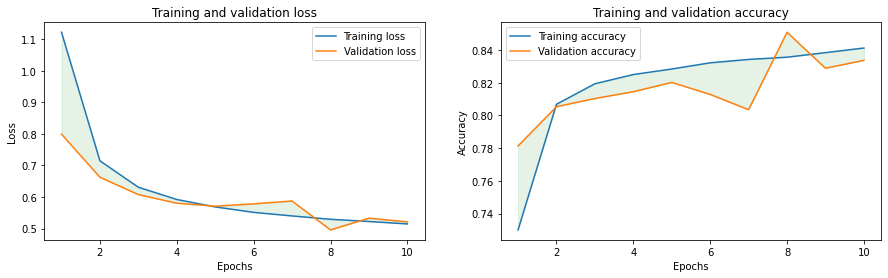

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [119]:
##### same architecture #### improving model prediction
def model_2_withRegularizerAdam():
    initializer = tf.keras.initializers.GlorotNormal()

    model2_R = models.Sequential()
    model2_R.add(layers.Dense(32, activation='relu', input_shape=(784,),kernel_initializer=initializer,kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model2_R.add(layers.Dense(32, activation='relu',kernel_initializer=initializer))
    model2_R.add(layers.Dense(10, activation='softmax',kernel_initializer=initializer))

    model2_R.summary()

    model2_R.compile(optimizer=optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model2_R.save_weights('model_2_R_Adam.h5')
    return model2_R

In [120]:
model_2_withRegularizerAdam = model_2_withRegularizerAdam()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [121]:
history = model_2_withRegularizerAdam.fit(train_ds,
                    epochs=15,
                    validation_data=val_ds)

Epoch 1/15
211/211 [==============================] - 1s 4ms/step - loss: 1.6443 - accuracy: 0.5819 - val_loss: 0.7080 - val_accuracy: 0.8210
Epoch 2/15
211/211 [==============================] - 1s 3ms/step - loss: 0.6739 - accuracy: 0.8242 - val_loss: 0.5886 - val_accuracy: 0.8363
Epoch 3/15
211/211 [==============================] - 1s 3ms/step - loss: 0.5796 - accuracy: 0.8375 - val_loss: 0.5508 - val_accuracy: 0.8407
Epoch 4/15
211/211 [==============================] - 1s 3ms/step - loss: 0.5423 - accuracy: 0.8424 - val_loss: 0.5252 - val_accuracy: 0.8437
Epoch 5/15
211/211 [==============================] - 1s 3ms/step - loss: 0.5200 - accuracy: 0.8462 - val_loss: 0.5044 - val_accuracy: 0.8497
Epoch 6/15
211/211 [==============================] - 1s 3ms/step - loss: 0.5029 - accuracy: 0.8512 - val_loss: 0.4928 - val_accuracy: 0.8510
Epoch 7/15
211/211 [==============================] - 1s 3ms/step - loss: 0.4903 - accuracy: 0.8527 - val_loss: 0.4884 - val_accuracy: 0.8520
Epoch 

In [123]:
model_2_withRegularizerAdam.evaluate(test_ds)

40/40 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.8559


[0.471525639295578, 0.85589998960495]

### Task 1.2 Train a ConvNet from scratch

*(weight ~5%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In [124]:
#load fashion-mnist data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [125]:
#image reshape
train_images = np.reshape(train_images,(train_images.shape[0],28,28,1))
test_images = np.reshape(test_images,(test_images.shape[0],28,28,1))

In [126]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [127]:
#convert labels into float datatype
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels.shape

(60000, 10)

In [128]:
# split validation and train from training data
x_val = train_images[train_size:]
y_val = train_labels[train_size:]
x_train = train_images[:train_size]
y_train = train_labels[:train_size]


In [129]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val))
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

In [130]:
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test_ds = configure_for_performance(test_ds)
train_ds

<BatchDataset shapes: ((None, 28, 28, 1), (None, 10)), types: (tf.uint8, tf.float32)>

In [131]:
IMAGE_SIZE = 28
def convNet():
  model = models.Sequential()
  model.add(layers.experimental.preprocessing.Rescaling(1./255))
  model.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape=(IMAGE_SIZE, IMAGE_SIZE,1)))
  model.add(layers.BatchNormalization(axis = 2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(512, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])
  return model

model = convNet()  

In [132]:
history = model.fit(
      train_ds,
      epochs=10,
      validation_data=val_ds
      )

Epoch 1/10
211/211 [==============================] - 5s 21ms/step - loss: 0.7071 - acc: 0.7464 - val_loss: 1.1453 - val_acc: 0.8855
Epoch 2/10
211/211 [==============================] - 4s 20ms/step - loss: 0.2795 - acc: 0.8971 - val_loss: 0.4034 - val_acc: 0.9003
Epoch 3/10
211/211 [==============================] - 4s 20ms/step - loss: 0.2183 - acc: 0.9184 - val_loss: 0.2293 - val_acc: 0.9155
Epoch 4/10
211/211 [==============================] - 4s 20ms/step - loss: 0.1767 - acc: 0.9339 - val_loss: 0.2345 - val_acc: 0.9138
Epoch 5/10
211/211 [==============================] - 4s 20ms/step - loss: 0.1485 - acc: 0.9431 - val_loss: 0.2476 - val_acc: 0.9197
Epoch 6/10
211/211 [==============================] - 4s 20ms/step - loss: 0.1151 - acc: 0.9566 - val_loss: 0.2543 - val_acc: 0.9137
Epoch 7/10
211/211 [==============================] - 4s 20ms/step - loss: 0.0992 - acc: 0.9617 - val_loss: 0.2972 - val_acc: 0.9118
Epoch 8/10
211/211 [==============================] - 4s 20ms/step - 

In [133]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_204 (Bat (None, 26, 26, 32)        104       
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_224 (Conv2D)          (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 128)       

In [134]:
model.evaluate(test_ds)

40/40 [==============================] - 0s 8ms/step - loss: 0.3938 - acc: 0.9098


[0.39377468824386597, 0.9097999930381775]

Accuracy of ConvNet is higher than the dense layer in test accuarcy which is achieved in lesser epoch.


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~3%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [28]:
aug = ImageDataGenerator(
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		horizontal_flip=True,
		fill_mode="nearest")

In [29]:
history = model.fit(
	x=aug.flow(x_train, y_train, batch_size=256),
	validation_data=val_ds,
  epochs=10
  )

Epoch 1/10
211/211 [==============================] - 13s 60ms/step - loss: 0.6433 - acc: 0.7685 - val_loss: 0.3007 - val_acc: 0.8868
Epoch 2/10
211/211 [==============================] - 12s 58ms/step - loss: 0.4273 - acc: 0.8402 - val_loss: 0.2834 - val_acc: 0.8987
Epoch 3/10
211/211 [==============================] - 13s 60ms/step - loss: 0.3864 - acc: 0.8573 - val_loss: 0.2747 - val_acc: 0.8998
Epoch 4/10
211/211 [==============================] - 12s 59ms/step - loss: 0.3617 - acc: 0.8642 - val_loss: 0.2574 - val_acc: 0.9050
Epoch 5/10
211/211 [==============================] - 12s 58ms/step - loss: 0.3496 - acc: 0.8701 - val_loss: 0.2539 - val_acc: 0.9047
Epoch 6/10
211/211 [==============================] - 12s 59ms/step - loss: 0.3347 - acc: 0.8764 - val_loss: 0.2449 - val_acc: 0.9098
Epoch 7/10
211/211 [==============================] - 12s 59ms/step - loss: 0.3278 - acc: 0.8777 - val_loss: 0.2500 - val_acc: 0.9032
Epoch 8/10
211/211 [==============================] - 12s 59ms

In [30]:
y_prob = model.predict(val_ds)
y_pred = y_prob.argmax(axis=-1)
y_true = y_val.argmax(axis=-1)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       630
           1       0.97      0.99      0.98       584
           2       0.91      0.81      0.86       602
           3       0.93      0.88      0.91       605
           4       0.83      0.88      0.85       633
           5       0.96      0.98      0.97       591
           6       0.77      0.72      0.75       565
           7       0.94      0.95      0.94       555
           8       0.99      0.99      0.99       616
           9       0.97      0.95      0.96       619

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



### Task 1.4 Fashion-MNIST with transfer learning

*(weight ~3%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



In [31]:
#load fashion-mnist data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [32]:
#image reshape
batch_size = 256
train_size = round(train_images.shape[0]*0.9,None)
train_images = train_images.reshape((60000,28*28))
test_images = test_images.reshape((10000,28*28))

In [33]:
#train_images=np.stack([train_images,train_images,train_images],axis=3)
#test_images=np.stack([test_images,test_images,test_images],axis=3)
train_images.shape

(60000, 784)

In [34]:
#convert labels into float datatype
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
# split validation and train from training data
train_size=54000
x_val = train_images[train_size:]
y_val = train_labels[train_size:]
x_train = train_images[:train_size]
y_train = train_labels[:train_size]

In [36]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val))
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
train_images.shape

(60000, 784)

In [37]:
base_model=tf.keras.applications.MobileNetV2(
    input_shape=(128,128,3),
    include_top=False,
    weights="imagenet")
base_model_resnet_inception=tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(128,128,3),
)

219062272/219055592 [==============================] - 1s 0us/step


In [38]:
def preTrained():
  model = models.Sequential()
  model.add(layers.experimental.preprocessing.Rescaling(1./255))
  model.add(layers.Dense(49152, activation='relu', input_shape=(784,)))
  model.add(Reshape((128,128,3), input_shape=(49152,)))
  model.add(base_model)
  model.add(layers.Flatten())
  model.add(layers.Dense(10, activation='softmax'))
  #Print a summary of the model ,kernel_regularizer=tf.keras.regularizers.l2(0.02),bias_regularizer=tf.keras.regularizers.l2(0.02)

  # Compiling the model by defininf an optimizer, a loss function, 
  # and the metrics to be used for monitoring the traning.
  model.compile(optimizer=optimizers.Adam(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
  return model
base_model.trainable=False
model = preTrained()  

In [40]:
history = model.fit(
          train_ds, epochs=10, 
          validation_data=val_ds
)

Epoch 1/10
211/211 [==============================] - 70s 334ms/step - loss: 0.4126 - acc: 0.8551 - val_loss: 0.3546 - val_acc: 0.8697
Epoch 2/10
211/211 [==============================] - 67s 320ms/step - loss: 0.3071 - acc: 0.8884 - val_loss: 0.3325 - val_acc: 0.8797
Epoch 3/10
211/211 [==============================] - 68s 320ms/step - loss: 0.2657 - acc: 0.9031 - val_loss: 0.3175 - val_acc: 0.8842
Epoch 4/10
211/211 [==============================] - 67s 320ms/step - loss: 0.2349 - acc: 0.9146 - val_loss: 0.3295 - val_acc: 0.8810
Epoch 5/10
211/211 [==============================] - 68s 320ms/step - loss: 0.2111 - acc: 0.9234 - val_loss: 0.3253 - val_acc: 0.8807
Epoch 6/10
211/211 [==============================] - 67s 320ms/step - loss: 0.1964 - acc: 0.9303 - val_loss: 0.3427 - val_acc: 0.8770
Epoch 7/10
211/211 [==============================] - 67s 320ms/step - loss: 0.1852 - acc: 0.9342 - val_loss: 0.3462 - val_acc: 0.8782
Epoch 8/10
211/211 [==============================] - 6

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 49152)             38584320  
_________________________________________________________________
reshape (Reshape)            (None, 128, 128, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                204810    
Total params: 41,047,114
Trainable params: 38,789,130
Non-trainable params: 2,257,984
__________________________________

In [42]:
def preTrained_Trainable():
  model = models.Sequential()
  model.add(layers.experimental.preprocessing.Rescaling(1./255))
  model.add(layers.Dense(49152, activation='relu', input_shape=(784,)))
  model.add(Reshape((128,128,3), input_shape=(49152,)))
  model.add(base_model)
  model.add(layers.Flatten())
  model.add(layers.Dense(10, activation='softmax'))
  #Print a summary of the model ,kernel_regularizer=tf.keras.regularizers.l2(0.02),bias_regularizer=tf.keras.regularizers.l2(0.02)

  # Compiling the model by defininf an optimizer, a loss function, 
  # and the metrics to be used for monitoring the traning.
  model.compile(optimizer=optimizers.Adam(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])
  return model
base_model.trainable=True
model = preTrained_Trainable()  

In [43]:
history = model.fit(
          train_ds, epochs=10, 
          validation_data=val_ds
)

Epoch 1/10
211/211 [==============================] - 114s 515ms/step - loss: 1.2294 - acc: 0.6114 - val_loss: 3.3658 - val_acc: 0.1438
Epoch 2/10
211/211 [==============================] - 108s 511ms/step - loss: 0.5069 - acc: 0.8230 - val_loss: 3.6709 - val_acc: 0.1152
Epoch 3/10
211/211 [==============================] - 108s 512ms/step - loss: 0.4036 - acc: 0.8534 - val_loss: 4.3035 - val_acc: 0.1413
Epoch 4/10
211/211 [==============================] - 107s 509ms/step - loss: 0.3434 - acc: 0.8739 - val_loss: 4.7017 - val_acc: 0.1297
Epoch 5/10
211/211 [==============================] - 108s 511ms/step - loss: 0.3030 - acc: 0.8870 - val_loss: 5.0848 - val_acc: 0.1325
Epoch 6/10
211/211 [==============================] - 108s 510ms/step - loss: 0.2638 - acc: 0.9010 - val_loss: 5.0657 - val_acc: 0.1502
Epoch 7/10
211/211 [==============================] - 107s 509ms/step - loss: 0.2435 - acc: 0.9079 - val_loss: 4.6703 - val_acc: 0.1525
Epoch 8/10
211/211 [============================

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 49152)             38584320  
_________________________________________________________________
reshape_1 (Reshape)          (None, 128, 128, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 20480)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                204810    
Total params: 41,047,114
Trainable params: 41,013,002
Non-trainable params: 34,112
_____________________________________

### Task 1.5 Performance comparison

*(weight ~3%)*

How many parameters are trainable in each of the two settings (with and without fine-tuning)? How does the difference impact the training time?


Which setting achieved higher accuracy? Why did it work better for this problem? 

Have we benefitted from using the pretrained model?


**Without fine-tuning:**

Trainable parameters: 38,789,130

non-trainable parameters: 2,257,984

**With fine-tuning:**

Trainable parameters: 41,013,002

non-trainable parameters: 34,112

2 million extra parameter is being trained when using fine-tuning. This is computationally expensive compared to former one. Thus, training time is greater. Also, using without fine tuning helps in feature extraction, so there is no redundancy in training parameters again. Meanwhile, in case of fine tuning, though the model is improving till epoch 10, training time will be substantially high.

## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



In [135]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [136]:
train_images.shape

(50000, 32, 32, 3)

#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [ ]:
pip install psutil

In [47]:
gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
  details = tf.config.experimental.get_device_details(gpu_devices[0])
  print("\n\n","-"*100,"\n\nGPU model:%s \n\n"%details.get('device_name', 'Unknown GPU'),"-"*100)
#print("\n\n","-"*100,"\n\n %str\n\n"%tf.test.gpu_device_name(),"-"*100)
print("\n\n","-"*100,"\n\n Num GPUs Available: %d \n\n"%len(tf.config.experimental.list_physical_devices('GPU')),"-"*100)



 ---------------------------------------------------------------------------------------------------- 

GPU model:Tesla T4 

 ----------------------------------------------------------------------------------------------------


 ---------------------------------------------------------------------------------------------------- 

 Num GPUs Available: 1 

 ----------------------------------------------------------------------------------------------------


In [137]:
import psutil
import time
model ="Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz"
print("\n\n","-"*100,"\n\n CPU model:%s\n\n"%model,"-"*100)
print("\n\n","-"*100,"\n\n number of CPU:%d\n\n"%psutil.cpu_count(logical=True),"-"*100)
print("\n\n","-"*100,"\n\n CPU clock speed:CPU @ 1.40GHz i.e. 1.4 billion cycles per second \n\n","-"*100)



 ---------------------------------------------------------------------------------------------------- 

 CPU model:Intel(R) Core(TM) i5-8257U CPU @ 1.40GHz

 ----------------------------------------------------------------------------------------------------


 ---------------------------------------------------------------------------------------------------- 

 number of CPU:2

 ----------------------------------------------------------------------------------------------------


 ---------------------------------------------------------------------------------------------------- 

 CPU clock speed:CPU @ 1.40GHz i.e. 1.4 billion cycles per second 

 ----------------------------------------------------------------------------------------------------


#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

In [138]:
#convert labels into float datatype
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [141]:
batch_size = 128
train_size = round(train_images.shape[0]*0.9,None)
train_size

45000

In [142]:
# split validation and train from training data
x_val = train_images[train_size:]
y_val = train_labels[train_size:]
x_train = train_images[:train_size]
y_train = train_labels[:train_size]

In [143]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val))
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
train_ds

<BatchDataset shapes: ((None, 32, 32, 3), (None, 10)), types: (tf.uint8, tf.float32)>

In [144]:
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))
test_ds = configure_for_performance(test_ds)

In [81]:
IMAGE_SIZE = 32
def convNet():
  model = models.Sequential()
  model.add(layers.experimental.preprocessing.Rescaling(1./255))
  model.add(layers.Conv2D(32, (3, 3), activation='relu',
                          input_shape=(IMAGE_SIZE, IMAGE_SIZE,3)))
  #model.add(layers.BatchNormalization(axis=1))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.AveragePooling2D((2, 2)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.AveragePooling2D((2, 2)))
  model.add(layers.Conv2D(256, (3, 3), activation='relu'))
  model.add(layers.AveragePooling2D((2, 2)))
  model.add(layers.Flatten())
  #model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])
  return model

model = convNet()  

In [82]:
#patience is set to 10 so that model will wait 10 epoch for training to improve.
callbacks=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min",
    restore_best_weights=True,
)

In [83]:
t0=time.process_time()
print("time0:",t0)
history = model.fit(
          train_ds, epochs=1000, 
          validation_data=val_ds,
          callbacks=[callbacks]
)
print(time.process_time())

time0: 2969.479687625
Epoch 1/1000
704/704 [==============================] - 6s 7ms/step - loss: 1.7985 - acc: 0.3382 - val_loss: 1.3644 - val_acc: 0.5170
Epoch 2/1000
704/704 [==============================] - 5s 7ms/step - loss: 1.2633 - acc: 0.5522 - val_loss: 1.0810 - val_acc: 0.6258
Epoch 3/1000
704/704 [==============================] - 5s 7ms/step - loss: 1.0630 - acc: 0.6314 - val_loss: 0.9600 - val_acc: 0.6724
Epoch 4/1000
704/704 [==============================] - 5s 7ms/step - loss: 0.9393 - acc: 0.6761 - val_loss: 0.8781 - val_acc: 0.6990
Epoch 5/1000
704/704 [==============================] - 5s 7ms/step - loss: 0.8452 - acc: 0.7075 - val_loss: 0.8185 - val_acc: 0.7142
Epoch 6/1000
704/704 [==============================] - 5s 7ms/step - loss: 0.7668 - acc: 0.7346 - val_loss: 0.7957 - val_acc: 0.7268
Epoch 7/1000
704/704 [==============================] - 5s 7ms/step - loss: 0.6987 - acc: 0.7586 - val_loss: 0.8010 - val_acc: 0.7272
Epoch 8/1000
704/704 [==================

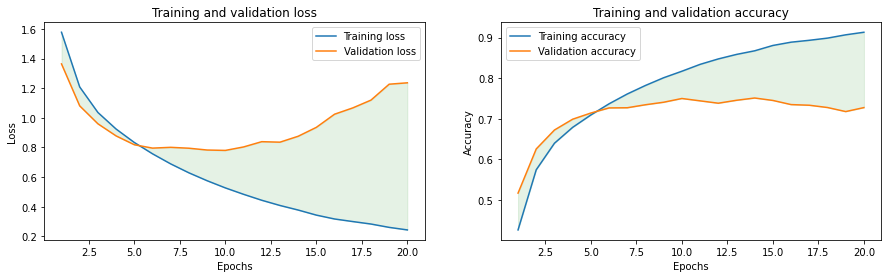

In [84]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [85]:
model.evaluate(test_ds)

157/157 [==============================] - 1s 3ms/step - loss: 0.8341 - acc: 0.7282


[0.8341469764709473, 0.7282000184059143]

#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [86]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(F1, (1, 1), strides = (1,1),padding='valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    # Second component of main path (≈3 lines)
    X = Conv2D(F2, (f, f), strides = (1, 1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    
    # Third component of main path (≈2 lines)
    X = Conv2D(F3, (1, 1), strides = (1, 1), padding = 'valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X

In [87]:
#convolutional_block

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s),padding='valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(F2, (f, f), strides = (1,1), padding='same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(F3, (1, 1), strides = (1,1), padding='valid', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(F3, (1, 1), strides = (s,s), padding='valid', name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    ### END CODE HERE ###
    
    return X

In [88]:
def ResNet32(input_shape = (32, 32, 3), classes = 6):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    #resizing
    X = layers.experimental.preprocessing.Rescaling(1./255)(X)
    
    # Stage 1
    X = Conv2D(32, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [32, 32, 64], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [32, 32, 64], stage=2, block='b')
    X = identity_block(X, 3, [32, 32, 64], stage=2, block='c')

    # Stage 3 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [64,64,128], stage = 3, block = 'a', s = 2)
    X = identity_block(X, 3, [64,64,128], stage = 3, block = 'b')
    X = identity_block(X, 3, [64,64,128], stage=3, block='c')

    # Stage 4 (≈6 lines)
    X = convolutional_block(X, f = 3, filters = [128,128,256], stage = 4, block = 'a', s = 2)
    X = identity_block(X, 3, [128,128,256], stage = 4, block = 'b')
    X = identity_block(X, 3, [128,128,256], stage=4, block='c')
    X = identity_block(X, 3, [128,128,256], stage=4, block='d')
   
    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D(pool_size=(2,2), name = 'avg_pool')(X)

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [145]:
model = ResNet32(input_shape = (32, 32, 3), classes = 10)

In [146]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [147]:
callbacks=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    mode="min",
    restore_best_weights=True,
)

In [148]:
t0=time.process_time()
history = model.fit(
          train_ds, epochs=10, 
          validation_data=val_ds,
)
print("training time:",time.process_time()-t0)

Epoch 1/10
352/352 [==============================] - 10s 20ms/step - loss: 2.0741 - accuracy: 0.3285 - val_loss: 2.7265 - val_accuracy: 0.2372
Epoch 2/10
352/352 [==============================] - 6s 18ms/step - loss: 1.3296 - accuracy: 0.5263 - val_loss: 1.6488 - val_accuracy: 0.4626
Epoch 3/10
352/352 [==============================] - 6s 18ms/step - loss: 1.1372 - accuracy: 0.5973 - val_loss: 1.4925 - val_accuracy: 0.4960
Epoch 4/10
352/352 [==============================] - 6s 18ms/step - loss: 0.9983 - accuracy: 0.6454 - val_loss: 2.2433 - val_accuracy: 0.3460
Epoch 5/10
352/352 [==============================] - 6s 18ms/step - loss: 0.8882 - accuracy: 0.6843 - val_loss: 1.3689 - val_accuracy: 0.5552
Epoch 6/10
352/352 [==============================] - 6s 18ms/step - loss: 0.7966 - accuracy: 0.7178 - val_loss: 1.4847 - val_accuracy: 0.5332
Epoch 7/10
352/352 [==============================] - 6s 18ms/step - loss: 0.7083 - accuracy: 0.7479 - val_loss: 1.9834 - val_accuracy: 0.489

In [149]:
model.evaluate(test_ds)

79/79 [==============================] - 1s 7ms/step - loss: 1.9711 - accuracy: 0.5032


[1.9711068868637085, 0.5031999945640564]

### Task 2.2 Fast training of ResNet

*(weight ~10%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also, Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [94]:
pip install tensorflow-addons

     |████████████████████████████████| 686kB 28.9MB/s 


In [95]:
import tensorflow_addons as tfa

In [150]:
#Option 1 : Cyclical learning rate & Exponential learning rate
lr_schedule=tfa.optimizers.CyclicalLearningRate(
    initial_learning_rate=0.001,
    maximal_learning_rate=0.005,
    step_size= 1760,
    scale_fn= lambda x: 1,
    scale_mode = 'cycle',
    name = 'CyclicalLearningRate'
)
lr_schedule_exponential=tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=1760,
    decay_rate=0.0005,
    staircase=True)

In [151]:
model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule), loss='categorical_crossentropy', metrics=['accuracy'])

In [152]:
t0=time.process_time()
history = model.fit(
          train_ds, epochs=10, 
          validation_data=val_ds,
)
print("training time:",time.process_time()-t0)

Epoch 1/10
352/352 [==============================] - 9s 19ms/step - loss: 0.5339 - accuracy: 0.8105 - val_loss: 1.0832 - val_accuracy: 0.6744
Epoch 2/10
352/352 [==============================] - 6s 18ms/step - loss: 0.4331 - accuracy: 0.8465 - val_loss: 1.0437 - val_accuracy: 0.6842
Epoch 3/10
352/352 [==============================] - 6s 17ms/step - loss: 0.3846 - accuracy: 0.8664 - val_loss: 1.0378 - val_accuracy: 0.6886
Epoch 4/10
352/352 [==============================] - 6s 17ms/step - loss: 0.3483 - accuracy: 0.8824 - val_loss: 1.0487 - val_accuracy: 0.6890
Epoch 5/10
352/352 [==============================] - 6s 17ms/step - loss: 0.3181 - accuracy: 0.8943 - val_loss: 1.0615 - val_accuracy: 0.6906
Epoch 6/10
352/352 [==============================] - 6s 17ms/step - loss: 0.2920 - accuracy: 0.9041 - val_loss: 1.0669 - val_accuracy: 0.6916
Epoch 7/10
352/352 [==============================] - 6s 17ms/step - loss: 0.2695 - accuracy: 0.9140 - val_loss: 1.0845 - val_accuracy: 0.6938

In [153]:
model.compile(optimizer=optimizers.SGD(learning_rate=lr_schedule_exponential), loss='categorical_crossentropy', metrics=['accuracy'])

In [154]:
t0=time.process_time()
history = model.fit(
          train_ds, epochs=10, 
          validation_data=val_ds,
)
print("training time:",time.process_time()-t0)

Epoch 1/10
352/352 [==============================] - 9s 19ms/step - loss: 1.2573 - accuracy: 0.6566 - val_loss: 2.3249 - val_accuracy: 0.4320
Epoch 2/10
352/352 [==============================] - 6s 17ms/step - loss: 0.5350 - accuracy: 0.8119 - val_loss: 2.2224 - val_accuracy: 0.4158
Epoch 3/10
352/352 [==============================] - 6s 17ms/step - loss: 0.3379 - accuracy: 0.8806 - val_loss: 1.4954 - val_accuracy: 0.6260
Epoch 4/10
352/352 [==============================] - 6s 18ms/step - loss: 0.2313 - accuracy: 0.9192 - val_loss: 1.8346 - val_accuracy: 0.5920
Epoch 5/10
352/352 [==============================] - 6s 17ms/step - loss: 0.2032 - accuracy: 0.9272 - val_loss: 2.1139 - val_accuracy: 0.5834
Epoch 6/10
352/352 [==============================] - 6s 17ms/step - loss: 0.3245 - accuracy: 0.8892 - val_loss: 1.5079 - val_accuracy: 0.6754
Epoch 7/10
352/352 [==============================] - 6s 17ms/step - loss: 0.3068 - accuracy: 0.8953 - val_loss: 1.4991 - val_accuracy: 0.6794

### Task 2.3 Performance comparison

*(weight ~3%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

Accuracy wise, model with cyclical learning rate performed better than exponential decay, whereas exponential performed better training time wise and the accuracy is almost similar to cyclical. So exponential decay set as learning rate schedule is better. 

Comparing to model using fixed learning, there is much improvement in training time which indicates that in deeper model or using more epoch, this learning rate scheduling will be a huge beneficial computationally and accuracy wise.

## Task 3 (**HD level task**) Research on new models
*(weight ~10%)*

Today, ResNet has become a very mature ConvNet architecture. In this task, you will research one recent ConvNet architecture. You may choose an architecture from the reference list below.

Write a short report for your research, covering these points:

- Identify the main issues that your chosen architecture aims to address. (For example, does it try to reduce the number of parameters or to speed up the training?)
- What measures the architecture used to reduce the number of parameters, or reducing the training cost, or improving the model performance?

Implement the architecture and compare its performance on CIFAR10 with ResNet. You may include your implementation, experiments, and analyses here in this notebook.

**References**:

1. Huang G, Liu Z, Van Der Maaten L, Weinberger KQ. *Densely connected convolutional networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2017 (pp. 4700-4708).
2. Zhang X, Zhou X, Lin M, Sun J. *Shufflenet: An extremely efficient convolutional neural network for mobile devices*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 6848-6856).
3. Tan M, Le Q. *Efficientnet: Rethinking model scaling for convolutional neural networks*. In International Conference on Machine Learning 2019 May 24 (pp. 6105-6114). PMLR.
4. Hu J, Shen L, Sun G. *Squeeze-and-excitation networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 7132-7141).


  #                            **DenseNets**
In recent years, it is observed that convulational networks can be have very deep layers. But the issue associated with such network is that it has high risk of vanishing gradient, computationally expensive due to high parameters. Taking such issues in consideration, Huang G et.al developed a model called ***DenseNets***. As the name suggests, the special feature of this model is that connects each layer to every other layer in a feed-forward step i.e. for each layer the feature-maps of all preceding layers are used as inputs, and it's own feature-maps as inputs into all subsequent layers.

One positive side-effect of this denseNet is that unlike traditional CNN models, it requires fewer parameters to trained as it keeps the informations to be preserved from previous layer. Besides parameter efficiency, the model has improved flow of information and gradient throughout the network which makes it easy to train. It is also observed that dense connections have a regularizing which helps in overcoming the overfitting issues with smaller training sizes. 

This model is similar to ResNets, except that the DenseNets use concatenation method for feature maps, whereas ResNets used summation. Inception model also used concatenation method but, DenseNets are simpler and more efficient.One of the top variants of DenseNets model is the one using bottleneck layers whose function is to reduce number of input feature-maps to improve computational efficiency. 

It's mentioned in the original paper published for this model that with substantially less parameters compared to other state-of-the-art model like ResNets, it produces comparable accuracy. Thus, this model has achieved to gain advantage using parameter efficiency, and computationally cheaper than other state-of-the-art models.




In [101]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, ZeroPadding2D, Dense, Dropout, Activation, Convolution2D, Reshape
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization

In [102]:
def conv_block(x, stage, branch, nb_filter, dropout_rate=None):
    conv_name_base = 'conv' + str(stage) + '_' + str(branch)
    relu_name_base = 'relu' + str(stage) + '_' + str(branch)

    # 1x1 Convolution (Bottleneck layer)
    inter_channel = nb_filter * 4  
    x = BatchNormalization(name=conv_name_base+'_x1_bn')(x)
    x = Activation('relu', name=relu_name_base+'_x1')(x)
    x = Convolution2D(inter_channel, 1, 1, name=conv_name_base+'_x1', use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    # 3x3 Convolution
    x = BatchNormalization(name=conv_name_base+'_x2_bn')(x)
    x = Activation('relu', name=relu_name_base+'_x2')(x)
    x = ZeroPadding2D((1, 1), name=conv_name_base+'_x2_zeropadding')(x)
    x = Convolution2D(nb_filter, 3, 1, name=conv_name_base+'_x2', use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)
    return x

In [103]:
def se_block(x, stage, previous, nb_filter, ratio = 16):
    se_name = 'se' + str(stage) + '_' + previous
    init = x
    x = GlobalAveragePooling2D(name='global_average_pooling_2d_'+se_name)(x)
    x = Dense(nb_filter // ratio, name='dense_relu_'+se_name)(x)
    x = Activation('relu', name='relu_'+se_name)(x)
    x = Dense(nb_filter, name='dense_sigmoid_'+se_name)(x)
    x = Activation('sigmoid', name='sigmoid_'+se_name)(x)
    x = tf.expand_dims(x,1)
    x = init * tf.expand_dims(x,1) 
    return x

In [104]:
def dense_block(x, stage, nb_layers, nb_filter, growth_rate, dropout_rate=None, 
                grow_nb_filters=True):
    concat_feat = x
    for i in range(nb_layers):
        branch = i+1
        x = conv_block(concat_feat, stage, branch, growth_rate, dropout_rate)
        concat_feat = tf.concat([concat_feat, x], -1)

        if grow_nb_filters:
            nb_filter += growth_rate

    return concat_feat, nb_filter

In [105]:
def transition_block(x, stage, nb_filter, compression=1.0, dropout_rate=None):
    conv_name_base = 'conv' + str(stage) + '_blk'
    relu_name_base = 'relu' + str(stage) + '_blk'
    pool_name_base = 'pool' + str(stage) 

    x = BatchNormalization(name=conv_name_base+'_bn')(x)
    x = Activation('relu', name=relu_name_base)(x)
    x = Convolution2D(int(nb_filter * compression), 1, 1, name=conv_name_base, use_bias=False)(x)

    if dropout_rate:
        x = Dropout(dropout_rate)(x)

    x = AveragePooling2D((2, 2), strides=(2, 2), name=pool_name_base)(x)

    return x

In [158]:
# For DenseNet-121
def densenet_model(growth_rate=24, nb_filter=64, nb_layers = [6,12,24,16], reduction=0.0, 
                   dropout_rate=0.0, classes=10, shape=(32, 32, 3), batch_size=128,
                   with_output_block=True, with_se_layers=True):
    # compute compression factor
    compression = 1.0 - reduction

    nb_dense_block = len(nb_layers)
    # From architecture for ImageNet (Table 1 in the paper)
    # nb_filter = 64
    # nb_layers = [6,12,24,16] # For DenseNet-121
    
    img_input = Input(shape=shape, name='data')
    
    x = ZeroPadding2D((3, 3), name='conv1_zeropadding', batch_size=batch_size)(img_input)
    x = Convolution2D(nb_filter, 7, 2, name='conv1', use_bias=False)(x)
    x = BatchNormalization(name='conv1_bn')(x)
    x = Activation('relu', name='relu1')(x)
    x = ZeroPadding2D((1, 1), name='pool1_zeropadding')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), name='pool1')(x)
    
    stage = 0
    # Add dense blocks
    for block_idx in range(nb_dense_block - 1):
        stage = block_idx+2
        x, nb_filter = dense_block(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate)

        if with_se_layers:
            x = se_block(x, stage, 'dense', nb_filter)

        # Add transition_block
        x = transition_block(x, stage, nb_filter, compression=compression, dropout_rate=dropout_rate)
        nb_filter = int(nb_filter * compression)

        if with_se_layers:
            x = se_block(x, stage, 'transition', nb_filter)

    final_stage = stage + 1
    x, nb_filter = dense_block(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate)

    if with_se_layers:
        x = se_block(x, final_stage, 'dense', nb_filter)

    x = BatchNormalization(name='conv_final_blk_bn')(x)
    x = Activation('relu', name='relu_final_blk')(x)
    
    if not with_output_block:
        return Model(inputs=img_input, outputs=x)

    x = GlobalAveragePooling2D(name='pool_final')(x)
    x = Dense(classes, name='fc6')(x)
    output = Activation('softmax', name='prob')(x)
    
    return Model(inputs=img_input, outputs=output)

In [159]:
model=densenet_model()

In [160]:
model.compile(optimizer=optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [161]:
t0=time.process_time()
history = model.fit(
          train_ds, epochs=10, 
          validation_data=val_ds,
)
print("training time:",time.process_time()-t0)

Epoch 1/10
352/352 [==============================] - 44s 92ms/step - loss: 1.6788 - accuracy: 0.4165 - val_loss: 1.8189 - val_accuracy: 0.3582
Epoch 2/10
352/352 [==============================] - 30s 85ms/step - loss: 1.0848 - accuracy: 0.6184 - val_loss: 1.6941 - val_accuracy: 0.4244
Epoch 3/10
352/352 [==============================] - 30s 86ms/step - loss: 0.8619 - accuracy: 0.6959 - val_loss: 1.2498 - val_accuracy: 0.5618
Epoch 4/10
352/352 [==============================] - 30s 85ms/step - loss: 0.7107 - accuracy: 0.7480 - val_loss: 1.4641 - val_accuracy: 0.5192
Epoch 5/10
352/352 [==============================] - 30s 85ms/step - loss: 0.5920 - accuracy: 0.7901 - val_loss: 1.3755 - val_accuracy: 0.5688
Epoch 6/10
352/352 [==============================] - 30s 85ms/step - loss: 0.4908 - accuracy: 0.8285 - val_loss: 2.0423 - val_accuracy: 0.5146
Epoch 7/10
352/352 [==============================] - 30s 86ms/step - loss: 0.4150 - accuracy: 0.8523 - val_loss: 2.2151 - val_accuracy:

This above model is 6-7 times deeper than above ResNet32 model. The model is able to reduce training time than as it should have been comparing to ResNet32 i.e. 500-600 secs.

The experiment is conducted using same hyperparameter in both model.

---
**END OF ASSIGNMENT TWO**